In [31]:
# ResNet50

In [4]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
from matplotlib import pyplot as plt

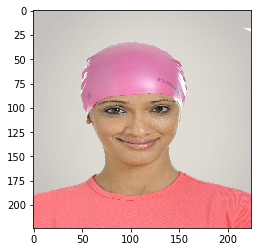

In [5]:
plt.imshow(img)

In [16]:
model = ResNet50(weights='imagenet', include_top = True)

img_path = './Data_original/images/1581.jpg'
img = image.load_img(img_path, target_size=(224, 224, 3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
# print('Predicted:', decode_predictions(preds, top=3)[0])

In [17]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [18]:
len(model.layers)

177

In [20]:
for l in model.layers:
    print (l.output)

Tensor("input_4:0", shape=(?, 224, 224, 3), dtype=float32)
Tensor("conv1_pad_3/Pad:0", shape=(?, 230, 230, 3), dtype=float32)
Tensor("conv1_3/BiasAdd:0", shape=(?, 112, 112, 64), dtype=float32)
Tensor("bn_conv1_3/cond/Merge:0", shape=(?, 112, 112, 64), dtype=float32)
Tensor("activation_148/Relu:0", shape=(?, 112, 112, 64), dtype=float32)
Tensor("pool1_pad_3/Pad:0", shape=(?, 114, 114, 64), dtype=float32)
Tensor("max_pooling2d_4/MaxPool:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("res2a_branch2a_3/BiasAdd:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("bn2a_branch2a_3/cond/Merge:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("activation_149/Relu:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("res2a_branch2b_3/BiasAdd:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("bn2a_branch2b_3/cond/Merge:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("activation_150/Relu:0", shape=(?, 56, 56, 64), dtype=float32)
Tensor("res2a_branch2c_3/BiasAdd:0", shape=(?, 56, 56, 256), dtype=float32

In [21]:
model.layers[-1].output

<tf.Tensor 'fc1000/Softmax:0' shape=(?, 1000) dtype=float32>

In [30]:
x.shape

(1, 224, 224, 3)

In [40]:
outputs

[<tf.Tensor 'input_4:0' shape=(?, 224, 224, 3) dtype=float32>,
 <tf.Tensor 'conv1_pad_3/Pad:0' shape=(?, 230, 230, 3) dtype=float32>,
 <tf.Tensor 'conv1_3/BiasAdd:0' shape=(?, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'bn_conv1_3/cond/Merge:0' shape=(?, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'activation_148/Relu:0' shape=(?, 112, 112, 64) dtype=float32>,
 <tf.Tensor 'pool1_pad_3/Pad:0' shape=(?, 114, 114, 64) dtype=float32>,
 <tf.Tensor 'max_pooling2d_4/MaxPool:0' shape=(?, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'res2a_branch2a_3/BiasAdd:0' shape=(?, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'bn2a_branch2a_3/cond/Merge:0' shape=(?, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'activation_149/Relu:0' shape=(?, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'res2a_branch2b_3/BiasAdd:0' shape=(?, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'bn2a_branch2b_3/cond/Merge:0' shape=(?, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'activation_150/Relu:0' shape=(?, 56, 56, 64) dtype=float32>,
 <tf.Tensor 'res2a_bra

In [45]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers][:]  

input_shape = (224, 244, 3)

funcs = [K.function(inp + [K.learning_phase()], [out]) for out in outputs]

# Testing
test = np.random.random(input_shape)[np.newaxis,...]


# functors[1]([x[0]])

layer_outs = [func([test, x[0]]) for func in functors]
print (layer_outs)

In [55]:
x[0].reshape((1, 224, 224, 3)).shape

(1, 224, 224, 3)

In [64]:
x.shape

(1, 224, 224, 3)

In [67]:
import keras.backend as K
K.clear_session()

In [71]:
layer_outs = [func([x]) for func in funcs]
print (layer_outs)

InvalidArgumentError: Tensor add_240:0, specified in either feed_devices or fetch_devices was not found in the Graph

In [34]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
___________________________________________________________________________________________

In [32]:
# VGG16

In [43]:
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np

model = VGG16(weights='imagenet', include_top = True)

img_path = './images/59752.jpg'
img = image.load_img(img_path, target_size=(224, 224,3))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

features = model.predict(x)
print('Predicted:', decode_predictions(features, top=3)[0])

Predicted: [('n02837789', 'bikini', 0.8071391), ('n02892767', 'brassiere', 0.13684478), ('n03710637', 'maillot', 0.047432855)]
